#  Aviation Risk Analysis Project

## Business Understanding

### Project Overview
As part of our company’s strategic diversification initiative, we are exploring opportunities in the aviation sector, specifically in operating commercial and private aircraft. This project aims to identify **low-risk aircraft models** that would provide the greatest potential for safe, sustainable, and cost-effective operations.

Using historical accident data from the National Transportation Safety Board, we analyze safety patterns to deliver **data-driven recommendations** that minimize operational, regulatory, and financial risks for the new aviation division.

### Business Problem
The company is entering the aviation industry with no prior operating experience in aircraft management. To mitigate potential risks and ensure successful market entry, the leadership team needs a **clear understanding of the historical safety records** associated with various aircraft models. Without proper due diligence, the company could face high maintenance costs, safety incidents, insurance liabilities, and reputational damage.

This project is tasked with translating complex accident data into simple, actionable insights to guide purchase decisions.

### Stakeholders
- **Head of Aviation Division:** Primary user of the recommendations, responsible for selecting the aircraft to purchase.
- **Executive Leadership Team:** Oversees investment decisions and needs a high-level risk profile to inform strategic planning.
- **Operations and Safety Teams:** Will rely on the risk assessments to develop operational procedures and compliance strategies once aircraft are acquired.

### Business Impact
By selecting aircraft with strong safety records:
- **Operational costs** (maintenance, downtime) can be significantly reduced.
- **Insurance premiums** and **regulatory compliance risks** can be minimized.
- **Passenger safety** and **brand reputation** are protected, supporting long-term business success.
- **Liability exposure** i.e potential financial or reputational harm is lowered, creating a more resilient entry into the aviation market.


## Data Understanding

### 1. Import Libraries

To begin the analysis, we import the necessary Python libraries:
- **Pandas**: for data manipulation and analysis.
- **Matplotlib** and **Seaborn**: for data visualization.

These libraries provide the core functionality required for cleaning, exploring, and visualizing the aviation accident dataset.


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2. Load the Dataset

The dataset used in this project is sourced from the National Transportation Safety Board and contains aviation accident and incident data spanning from 1962 to 2023. 

We load the data using `pandas.read_csv()`. 
To handle special characters in the data (such as smart quotes and accents) and avoid Unicode errors, we specify `encoding='latin1'`. 

The first few rows of the dataset are displayed to provide an initial view of the data structure.

In [44]:
# The file contains special non-UTF-8 characters (e.g., smart quotes, accents)
# specify encoding='latin1' to correctly read the file without UnicodeDecodeErrors

aviation_df = pd.read_csv('Data/AviationData.csv', encoding='latin1')
aviation_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_37616\2706028318.py:4: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv('Data/AviationData.csv', encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### 3. Overview of the Dataset
Once the data is loaded, the first step is to get a sense of its basic structure:

- **Shape:** The dataset contains __X rows and Y columns__, with each row representing an individual aviation accident report and its related details.

- **Columns:** It covers a wide range of information, including the event date, aircraft make and model, injury severity, aircraft category, and a narrative description of the incident.

We also take a look at some basic descriptive statistics for the numerical columns. This gives us an early glimpse into variables like the number of fatalities, serious injuries, and the extent of aircraft damage.

By doing this initial check, we can start spotting patterns, recognize areas that might need deeper investigation, and identify any columns that could require cleaning or special attention before moving forward.

In [45]:
print("Shape of the dataset:", aviation_df.shape)
print("\nColumns available:\n", aviation_df.columns.tolist())
aviation_df.describe()

Shape of the dataset: (88889, 31)

Columns available:
 ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### 4. Missing Values Analysis

A key step in data understanding is identifying missing values, as they can significantly impact the quality and reliability of any subsequent analysis.

We calculate the total number of missing entries for each column and visualize the results using a static bar chart. 

This visualization highlights:
- Which columns have significant missing data
- Potential challenges in the cleaning and imputation phases
- Columns that may require exclusion, special treatment, or imputation strategies

Understanding the extent of missingness allows us to prioritize which features to retain, drop, or engineer during the data preparation phase.

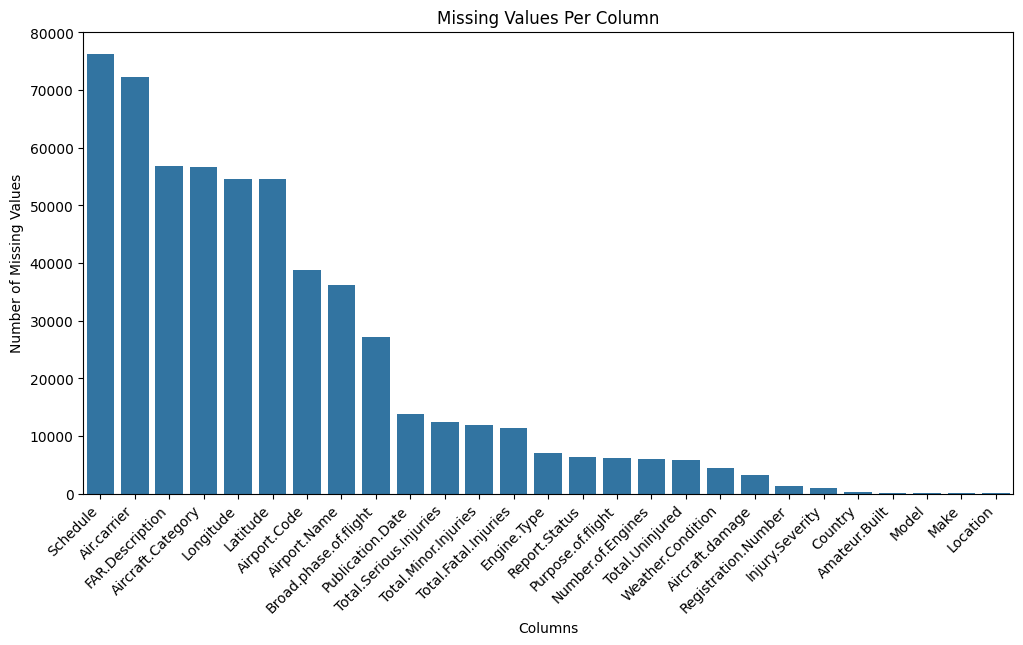

In [46]:
# Calculate Missing Values
missing_values = aviation_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values Per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show();

**Summary:**
The dataset is rich but contains substantial missing data in certain fields. Our next step will focus on selecting relevant features and handling missing values appropriately to support actionable business recommendations.

## Data Preparation (Cleaning)

### 1. Handling Missing Values
#### Overview
Before conducting any analysis, it is crucial to handle missing data appropriately to maintain the integrity of the results.
Our strategy is:
- Drop columns where over 80% of the data is missing.
- Fill missing values:
    - For categorical columns, replace missing values with 'Unknown'.
    - For numerical columns, replace missing values with the median of each column.

This ensures that we retain as much useful data as possible without introducing bias or noise.

In [47]:
# Calculate missing values
missing_values = aviation_df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(aviation_df)) * 100

# Create a DataFrame to view missing data clearly
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Display only columns with missing data
missing_df[missing_df['Missing Values'] > 0]


,Missing Values,Percentage (%)
Schedule,76307,85.845268
Air.carrier,72241,81.271023
FAR.Description,56866,63.974170
Aircraft.Category,56602,63.677170
Longitude,54516,61.330423
Latitude,54507,61.320298
Airport.Code,38757,43.601570
Airport.Name,36185,40.708074
Broad.phase.of.flight,27165,30.560587
Publication.Date,13771,15.492356


#### Drop Columns with >80% Missing Values

In [48]:
# Drop columns with more than 80% missing values
cols_to_drop = missing_df[missing_df['Percentage (%)'] > 80].index.tolist()
aviation_df.drop(columns=cols_to_drop, inplace=True)

print(f"Dropped columns due to high missingness: {cols_to_drop}")

Dropped columns due to high missingness: ['Schedule', 'Air.carrier']


#### Fill Missing Categorical and Numerical Data

In [49]:
# Fill missing categorical values with 'Unknown'
categorical_cols = aviation_df.select_dtypes(include='object').columns
aviation_df[categorical_cols] = aviation_df[categorical_cols].fillna('Unknown')

# Fill missing numerical values with the median
numerical_cols = aviation_df.select_dtypes(include='number').columns
aviation_df[numerical_cols] = aviation_df[numerical_cols].fillna(aviation_df[numerical_cols].median())

### 2. Cleaning and Standardizing Column Names

### Column Name Standardization

To make the dataset easier to work with and avoid errors during data manipulation, we standardized the column names using the following steps:

- Converted all column names to **lowercase**.
- Replaced **dots (`.`), slashes (`/`), and dashes (`-`)** with underscores `_` for Python-friendly access.
- Removed **special characters** like parentheses `(` `)` that can interfere with functions or visualizations.
- Stripped any **leading or trailing spaces** to ensure consistency.

This helps maintain a clean and consistent format throughout the notebook, reducing the chance of syntax issues when referencing columns later on.


In [50]:
import string

# Start with lowercase and strip whitespace
aviation_df.columns = aviation_df.columns.str.lower().str.strip()

# Define punctuation to remove or replace
replace_with_underscore = ['.', '/', '-']
remove_chars = ['(', ')']

# Replace specific punctuation with underscore
for symbol in replace_with_underscore:
    aviation_df.columns = aviation_df.columns.str.replace(symbol, '_', regex=False)

# Remove unwanted punctuation
for symbol in remove_chars:
    aviation_df.columns = aviation_df.columns.str.replace(symbol, '', regex=False)

aviation_df.columns


Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'report_status', 'publication_date'],
      dtype='object')

### 3. Feature Engineering
To prepare the dataset for meaningful risk analysis, we engineered the following features:

- **Injury Severity Cleanup**: The `injury_severity` column contains inconsistent values such as `'FATAL(114)'`, `'MINOR'`, and `'INCIDENT'`. We extracted a consistent severity label using regular expressions and mapped each category to a numeric score.
  
- **Severity Score**: We assigned each cleaned label a numerical score to quantify severity:
  - FATAL → 3
  - SERIOUS → 2
  - MINOR → 1
  - NON-FATAL / INCIDENT → 0
  - UNKNOWN → -1

- **Fatality Count**: We extracted the number in parentheses from labels like `'FATAL(114)'` to compare against `total_fatal_injuries`.

- **Year Extraction**: We extracted the year from the `event_date` column to support time-based analysis (e.g., trends over time).

These features allow us to group by year, model, or severity, enabling a comprehensive view of risk over time and across aircraft types.

In [51]:
import re

# 1. Standardize casing: first letter uppercase, rest lowercase
aviation_df['injury_severity'] = (
    aviation_df['injury_severity']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.capitalize()
)

# 2. Extract base severity category from strings like 'Fatal(114)'
aviation_df['injury_severity_clean'] = aviation_df['injury_severity'].str.extract(
    r'^(Fatal|Serious|Minor|Non-fatal|Incident)', expand=False
)

# 3. Fill unknowns
aviation_df['injury_severity_clean'] = aviation_df['injury_severity_clean'].fillna('Unknown')

# 4. Map categories to numeric severity score
severity_mapping = {
    'Fatal': 3,
    'Serious': 2,
    'Minor': 1,
    'Non-fatal': 0,
    'Incident': 0,
    'Unknown': -1
}
aviation_df['severity_score'] = aviation_df['injury_severity_clean'].map(severity_mapping)

# 5. extract fatality count from patterns like 'Fatal(114)'
aviation_df['fatal_injury_extracted'] = aviation_df['injury_severity'].str.extract(r'Fatal\((\d+)\)').astype(float)
aviation_df['fatal_injury_extracted'] = aviation_df['fatal_injury_extracted'].fillna(0)

# 6. Convert 'event_date' to datetime and extract 'year'
aviation_df['event_date'] = pd.to_datetime(aviation_df['event_date'], errors='coerce')
aviation_df['year'] = aviation_df['event_date'].dt.year


### Final Dataset Check
Before moving on to analysis, it is important to verify that:
- The data has no critical missing values.
- New features have been correctly created.

The structure is ready for modeling or visualization.

In [52]:
# Review final dataset information
aviation_df.info()

# View basic descriptive statistics
aviation_df.describe()

# Preview first few rows of cleaned data
aviation_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                88889 non-null  object        
 1   investigation_type      88889 non-null  object        
 2   accident_number         88889 non-null  object        
 3   event_date              88889 non-null  datetime64[ns]
 4   location                88889 non-null  object        
 5   country                 88889 non-null  object        
 6   latitude                88889 non-null  object        
 7   longitude               88889 non-null  object        
 8   airport_code            88889 non-null  object        
 9   airport_name            88889 non-null  object        
 10  injury_severity         88889 non-null  object        
 11  aircraft_damage         88889 non-null  object        
 12  aircraft_category       88889 non-null  object

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,injury_severity_clean,severity_score,fatal_injury_extracted,year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,UNK,Cruise,Probable Cause,Unknown,Fatal,3,2.0,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,Fatal,3,4.0,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Unknown,Unknown,...,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007,Fatal,3,3.0,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,Fatal,3,2.0,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,Fatal,3,1.0,1979
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,Unknown,Unknown,...,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,Non-fatal,0,0.0,1979
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,Fatal,3,4.0,1981
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Unknown,Unknown,Unknown,BLACKBURN AG STRIP,...,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,Non-fatal,0,0.0,1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Unknown,Unknown,N58,HANOVER,...,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,Non-fatal,0,0.0,1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,Unknown,Unknown,JAX,JACKSONVILLE INTL,...,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,Non-fatal,0,0.0,1982


After completing the data preparation and feature engineering steps, the dataset is now structured and ready for analysis. Key transformations include:

- **Standardized formatting** of all column names for consistency and ease of use.
- **Cleaned and categorized** `injury_severity` values by extracting the base labels (e.g., `'Fatal'`, `'Serious'`, etc.).
- **Numeric `severity_score`** assigned to each incident for quantitative analysis.
- **Converted** `event_date` to a datetime object and extracted the `year` to enable time-based trend analysis.
- **Extracted numeric fatality counts** from complex labels like `'Fatal(114)'` into a new column `fatal_injury_extracted`.

To ensure consistency in the `fatal_injury_extracted` column, we replaced missing values (`NaN`) with `0`, since not all severity labels included explicit counts. This allows us to treat missing counts as zero fatalities during aggregation and comparison.

With these transformations in place, the dataset is now clean and ready for analysis and visualization.

In [53]:
aviation_df.isnull().sum().sort_values(ascending=False)

event_id                  0
investigation_type        0
accident_number           0
event_date                0
location                  0
country                   0
latitude                  0
longitude                 0
airport_code              0
airport_name              0
injury_severity           0
aircraft_damage           0
aircraft_category         0
registration_number       0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
far_description           0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
report_status             0
publication_date          0
injury_severity_clean     0
severity_score            0
fatal_injury_extracted    0
year                      0
dtype: int64

## Exploratory Data Analysis (EDA)

### 1. Distribution of Aviation Accidents by Year
Understanding how aviation accidents trend over time helps us identify whether safety has improved or worsened. This line chart displays the number of reported aviation accidents per year.  It allows us to ask:
- Are accidents increasing, decreasing, or remaining steady over time?
- Are there specific periods with notable spikes or drops?
- Could these shifts correlate with global events, changes in aviation regulations, or technological advancements?

A sudden increase might suggest reporting improvements or periods of high flight volume, while sharp drops may indicate missing data or safety improvements.

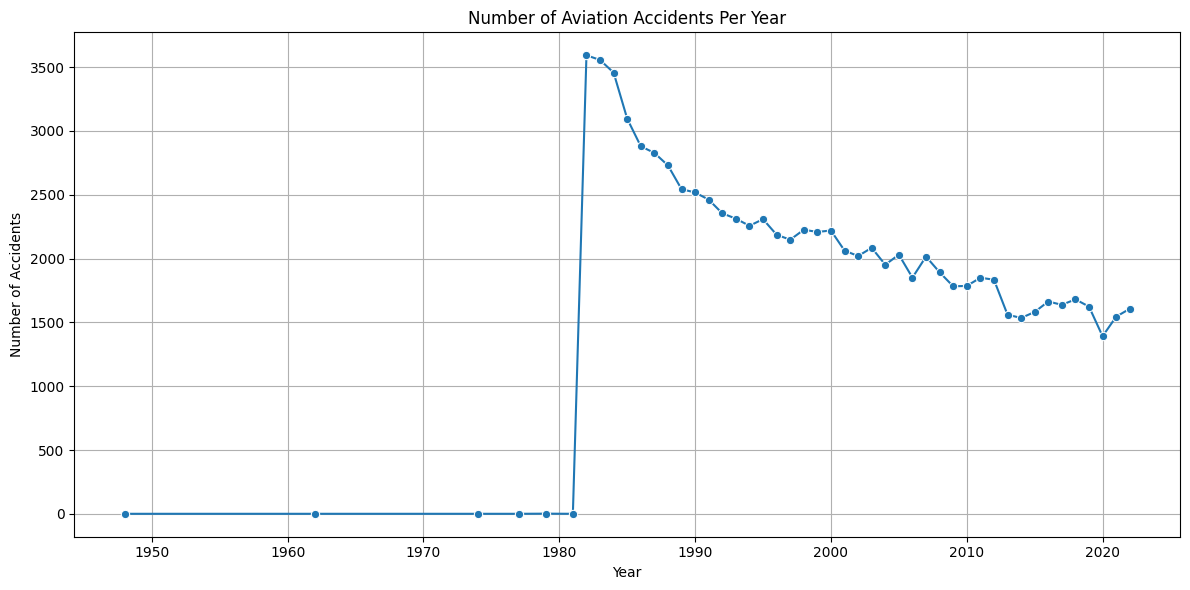

In [54]:
# Group accidents by year and count
accidents_by_year = aviation_df['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=accidents_by_year.index, y=accidents_by_year.values, marker='o')
plt.title("Number of Aviation Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.tight_layout()
plt.show();

**Trend Analysis:**
From 1950 to around 1980, the number of accidents remained relatively low and stable.
There is a sharp increase in accidents around the early 1980s, peaking dramatically.
Post-1980s, there is a noticeable decline in the number of accidents, with some fluctuations.
From the late 1990s onwards, the number of accidents shows a general downward trend, with occasional spikes.

**Insights:**
The spike in the 1980s could be attributed to various factors such as increased air traffic, changes in regulations, or specific events affecting aviation safety.
The subsequent decline suggests improvements in safety measures, technology, and regulatory frameworks over the years.

### 2. Most Frequently Involved Aircraft Models in Accidents
This horizontal bar chart highlights the 15 aircraft models most frequently reported in accident records.

Key questions we can explore from this:
- Are certain models disproportionately involved in accidents?
- Do popular or widely used models (e.g., general aviation aircraft like Cessna 172) naturally appear more often due to higher flight volume?
- Could certain models have historical design or performance issues?

While high frequency doesn't necessarily imply poor safety (some models are simply more common), repeated appearance of a specific model may warrant a deeper dive, especially when cross-analyzed with severity, damage, or flight purpose.

C:\Users\user\AppData\Local\Temp\ipykernel_37616\416004966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=model_counts.index, x=model_counts.values, palette="viridis")


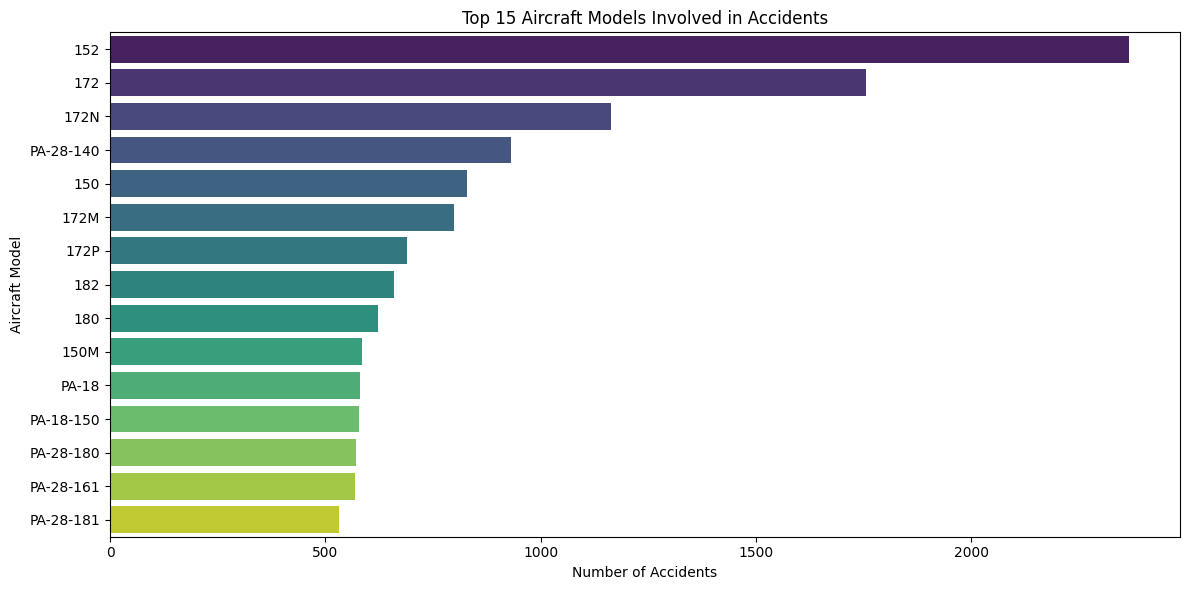

In [55]:
# Count the number of accidents per aircraft model
model_counts = aviation_df['model'].value_counts().head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=model_counts.index, x=model_counts.values, palette="viridis")
plt.title("Top 15 Aircraft Models Involved in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Model")
plt.tight_layout()
plt.show();

**Model Analysis:**
The model "152" has the highest number of accidents, followed by "172" and "172N."
There is a significant drop in accident numbers after the top three models.

**Insights:**
Certain models, particularly those used widely in general aviation, appear more frequently in accidents.
This could be due to their popularity, usage patterns, or specific design characteristics.
Targeted safety measures for these models could potentially reduce accident rates.

### 3. HeatMap: Aircraft Model vs Broad Phase of Flight (Aggregated)

The heatmap will show the relationship between aircraft models and the phases of flight during accidents. By identifying which models are involved in accidents during specific flight phases (such as takeoff, cruise, or landing), we can gain insights into the most vulnerable stages of flight for different aircraft.

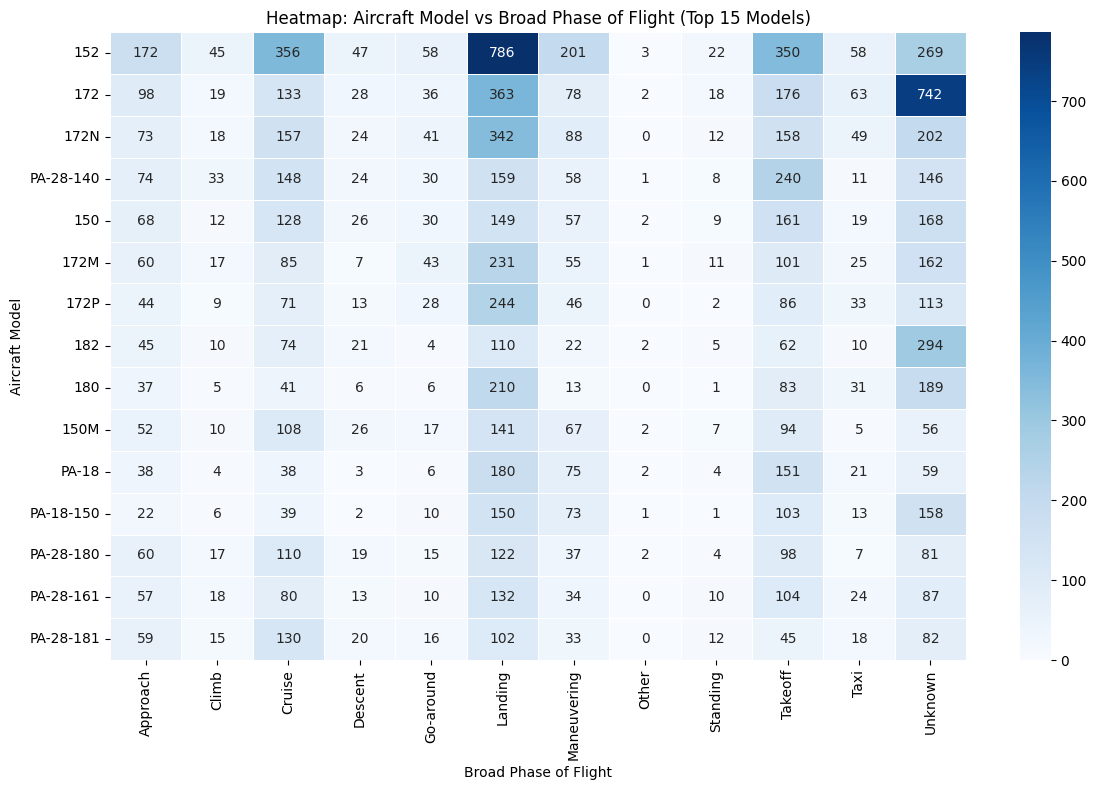

In [61]:
# Identify top 10 aircraft models based on the number of incidents
top_models = aviation_df['model'].value_counts().head(15).index

# Aggregate accident counts by model and phase of flight
heatmap_data = aviation_df.groupby(['model', 'broad_phase_of_flight']).size().unstack(fill_value=0)

# Only plot a subset of the top models for efficiency
heatmap_data = heatmap_data.loc[top_models]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Heatmap: Aircraft Model vs Broad Phase of Flight (Top 15 Models)')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Aircraft Model')
plt.tight_layout()
plt.show()


**Phase Analysis:**
The "Landing" phase has the highest frequency of accidents across several models, particularly for "152" and "172."
"Takeoff" and "Cruise" phases also show notable accident frequencies for certain models.

**Insights:**
Landing is a critical phase with high accident rates, suggesting a need for enhanced training and safety protocols during this phase.
Specific models show higher accident rates in particular phases, indicating potential areas for targeted safety improvements.

### 4. Injury Severity Analysis

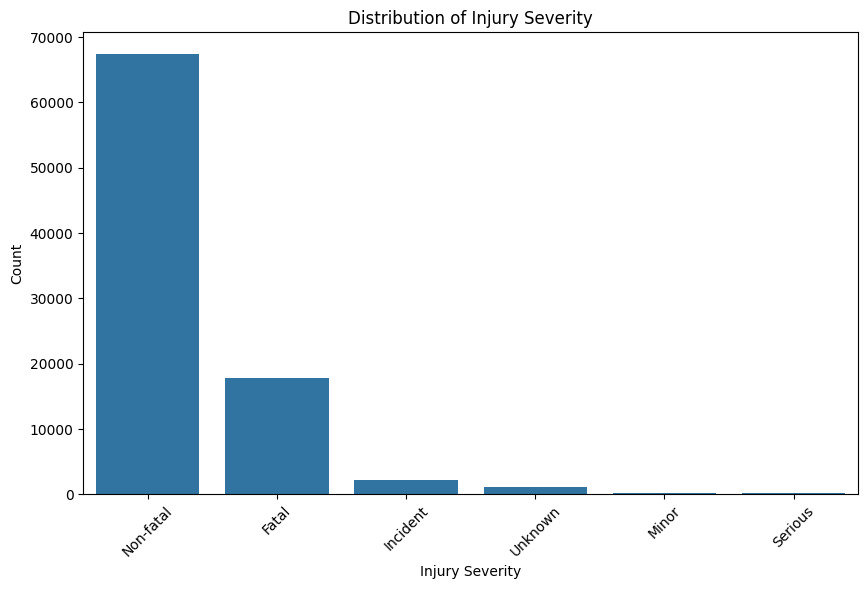

In [63]:


# Distribution of injury severity
severity_distribution = aviation_df['injury_severity_clean'].value_counts()

# Plot distribution of injury severity for the top categories
plt.figure(figsize=(10, 6))
sns.barplot(x=severity_distribution.index, y=severity_distribution.values, order=severity_distribution.index)
plt.title('Distribution of Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Non-fatal** accidents are the most common, followed by **Fatal** accidents.
**Incident**, **Unknown,** **Minor,** and **Serious** categories have significantly lower counts.

**Insights:**
The high number of non-fatal accidents suggests that while accidents are frequent, many do not result in severe injuries.
Efforts to reduce fatal accidents could focus on identifying and mitigating factors contributing to severity.